In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('dataset/supermarket_sales.csv')

In [21]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.groupby('Date').agg({
    'Quantity': 'sum'       # Sum of quantity sold
})
df = pd.DataFrame(df)

In [22]:
df

,Quantity
Date,
2019-01-01,81
2019-01-02,48
2019-01-03,37
2019-01-04,32
2019-01-05,55
...,...
2019-03-26,52
2019-03-27,45
2019-03-28,48


<Axes: xlabel='Date', ylabel='Quantity'>

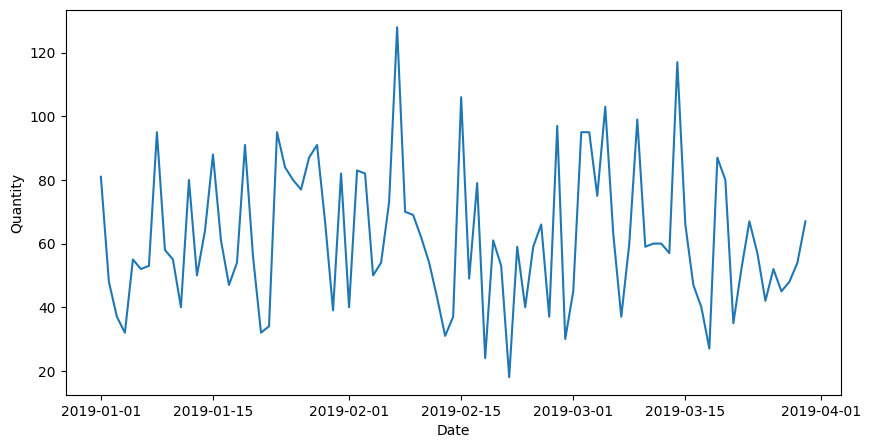

In [23]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = df, x = df.index, y = df.Quantity)

In [24]:
from statsmodels.tsa.stattools import adfuller
adfTest = adfuller(df, autolag = None, maxlag = 3)
dfoutput = pd.Series(adfTest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in adfTest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test Statistic                 -4.674409
p-value                         0.000094
#Lags Used                      3.000000
Number of Observations Used    85.000000
Critical Value (1%)            -3.509736
Critical Value (5%)            -2.896195
Critical Value (10%)           -2.585258
dtype: float64


In [25]:
df['firstDiff'] = df['Quantity'].diff()
df

,Quantity,firstDiff
Date,,
2019-01-01,81,NaN
2019-01-02,48,-33.0
2019-01-03,37,-11.0
2019-01-04,32,-5.0
2019-01-05,55,23.0
...,...,...
2019-03-26,52,10.0
2019-03-27,45,-7.0
2019-03-28,48,3.0


In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

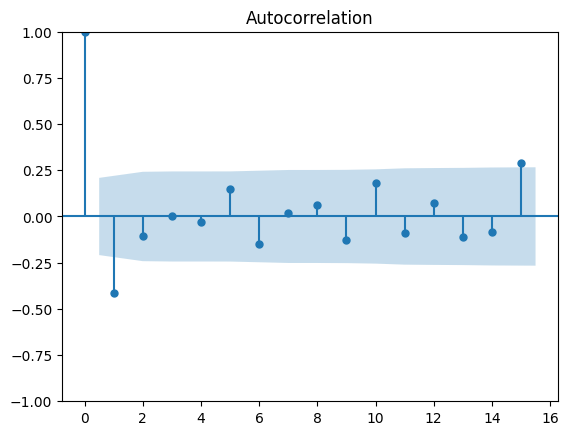

In [27]:
plot_acf(df['firstDiff'].dropna(),lags=15);

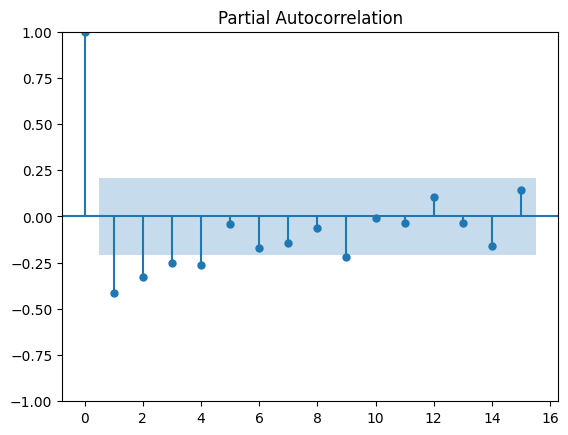

In [28]:
plot_pacf(df['firstDiff'].dropna(),lags=15);

In [29]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Quantity'], order = (9,1,15))
model_fit = model.fit()

C:\Users\prosa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\prosa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\prosa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\prosa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCac

In [30]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(days = x) for x in range(0, 10)]
future_dates_df = pd.DataFrame(index = future_dates[1:], columns = df.columns)
df = pd.concat([df, future_dates_df])

C:\Users\prosa\AppData\Local\Temp\ipykernel_11904\3160956900.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, future_dates_df])


In [31]:
prediction = model_fit.predict(start = future_dates_df.index[0] - DateOffset(days = 30), end = future_dates_df.index[-1])
df['arimaPred'] = prediction
df.tail()

,Quantity,firstDiff,arimaPred
2019-04-04,NaN,NaN,53.461965
2019-04-05,NaN,NaN,61.011725
2019-04-06,NaN,NaN,63.725516
2019-04-07,NaN,NaN,75.550862
2019-04-08,NaN,NaN,63.047580


<Axes: xlabel='Date', ylabel='Quantity'>

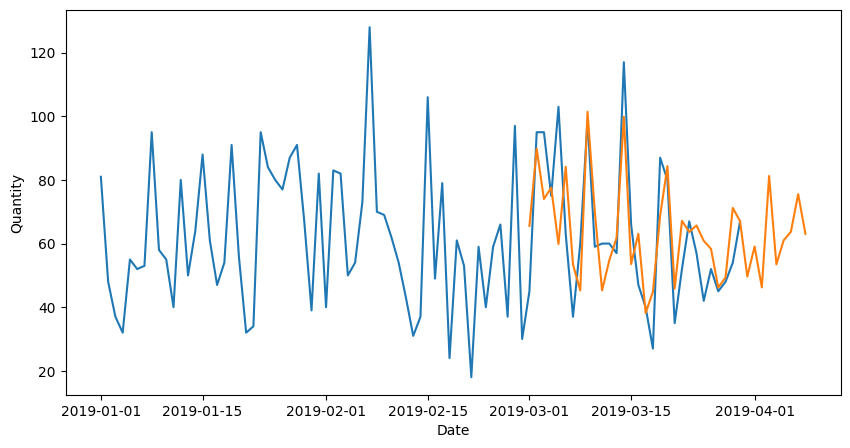

In [32]:
plt.figure(figsize = (10, 5))
plt.xlabel("Date")
sns.lineplot(data = df, x = df.index, y = 'Quantity')
sns.lineplot(data = df, x = df.index, y = 'arimaPred')

In [33]:
df.iloc[-39:-9]

,Quantity,firstDiff,arimaPred
2019-03-01,45,15.0,65.557992
2019-03-02,95,50.0,89.832237
2019-03-03,95,0.0,73.994598
2019-03-04,75,-20.0,77.590975
2019-03-05,103,28.0,59.852355
2019-03-06,63,-40.0,84.130755
2019-03-07,37,-26.0,53.425216
2019-03-08,60,23.0,45.273003
2019-03-09,99,39.0,101.440934
2019-03-10,59,-40.0,70.110554


In [34]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(df['Quantity'].iloc[-39:-9], df['arimaPred'].iloc[-39:-9]))

14.829374147613075